In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('data/df_to_encode.csv')

## OneHotEncoder

In [5]:
df_encoded = df.copy()

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_encoded[['property_types']])
# Verifica el número de características generadas
feature_names = encoder.get_feature_names_out()
print(f'Number of feature names: {len(feature_names)}')
print(f'Number of encoded features: {encoded_features.shape[1]}')

# Crear el DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

Number of feature names: 2
Number of encoded features: 2


In [6]:
encoded_df = encoded_df.rename(columns={'property_types_Habitación': 'habitacion'})
encoded_df = encoded_df.rename(columns={'property_types_otro': 'alojamiento entero'})
encoded_df.head()

,habitacion,alojamiento entero
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


### Lo unimos todo y dropeamos property_types

In [8]:
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.head()

,property_types,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,Alojamiento entero,115.0,0.00,0.0,0.0,1.0,1.0,1.0,NaN,900.0,...,7,1,2,1,0,0,1,4,0.0,0.0
1,Habitación,46.0,0.00,0.0,15.0,1.0,1.0,0.5,1.0,1020.0,...,6,0,0,2,0,2,0,1,1.0,0.0
2,Habitación,47.0,4.66,65.0,0.0,1.0,1.0,0.5,1.0,900.0,...,8,1,1,1,0,1,0,5,1.0,0.0
3,Alojamiento entero,100.0,4.89,0.0,35.0,1.0,1.0,1.0,1.0,960.0,...,10,10,3,2,2,0,5,4,0.0,0.0
4,Habitación,33.0,4.40,990.0,0.0,1.0,1.0,0.5,1.0,900.0,...,4,0,1,1,0,0,3,1,1.0,0.0


In [9]:
df_encoded[['habitacion','alojamiento entero']].value_counts()

habitacion  alojamiento entero
0.0         0.0                   1262
1.0         0.0                   1220
0.0         1.0                     15
Name: count, dtype: int64

In [10]:
df_encoded = df_encoded.drop('property_types',axis= 1)

In [11]:
df_encoded['habitacion'] = df_encoded['habitacion'].astype('int64')

In [12]:
df_encoded['alojamiento entero'] = df_encoded['alojamiento entero'].astype('int64')

In [13]:
df_encoded.isna().sum()

prices_per_night                     0
ratings                              0
num_reviews                          0
cleaning_fee                        71
dormitorios                         35
camas                              103
baños                               65
maximum_guests                       2
check_in_hour                      192
check_out_hour                     184
total_hours_checkin                192
aparcamiento e instalaciones         0
baño                                 0
calefacción y refrigeración          0
características de la ubicación      0
cocina y comedor                     0
dormitorio y lavandería              0
entretenimiento                      0
exterior                             0
internet y oficina                   0
para familias                        0
privacidad y seguridad               0
seguridad en el hogar                0
servicios                            0
habitacion                           0
alojamiento entero       

In [14]:
#df_encoded.to_csv('df_para_KNN.csv')

## KNN Imputer

In [16]:
%%time
imputer = KNNImputer(n_neighbors=10) 
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded

CPU times: total: 203 ms
Wall time: 67.4 ms


,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,115.0,0.00,0.0,0.0,1.0,1.0,1.0,3.4,900.0,720.0,...,7.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
1,46.0,0.00,0.0,15.0,1.0,1.0,0.5,1.0,1020.0,660.0,...,6.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
2,47.0,4.66,65.0,0.0,1.0,1.0,0.5,1.0,900.0,720.0,...,8.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
3,100.0,4.89,0.0,35.0,1.0,1.0,1.0,1.0,960.0,720.0,...,10.0,10.0,3.0,2.0,2.0,0.0,5.0,4.0,0.0,0.0
4,33.0,4.40,990.0,0.0,1.0,1.0,0.5,1.0,900.0,660.0,...,4.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,55.0,4.74,197.0,10.0,1.0,1.0,0.5,3.0,900.0,660.0,...,7.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0
2493,60.0,4.78,59.0,0.0,1.0,1.0,0.5,2.0,900.0,600.0,...,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2494,104.0,4.96,0.0,0.0,2.0,3.0,2.0,4.0,900.0,720.0,...,9.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0
2495,120.0,4.83,136.0,50.0,1.0,1.0,1.0,2.0,900.0,660.0,...,8.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0


## Creamos una copia

In [18]:
df = df_encoded.copy()

In [19]:
df.to_csv('data/df_depuracion.csv', index = False)

## HeatMap

<Axes: >

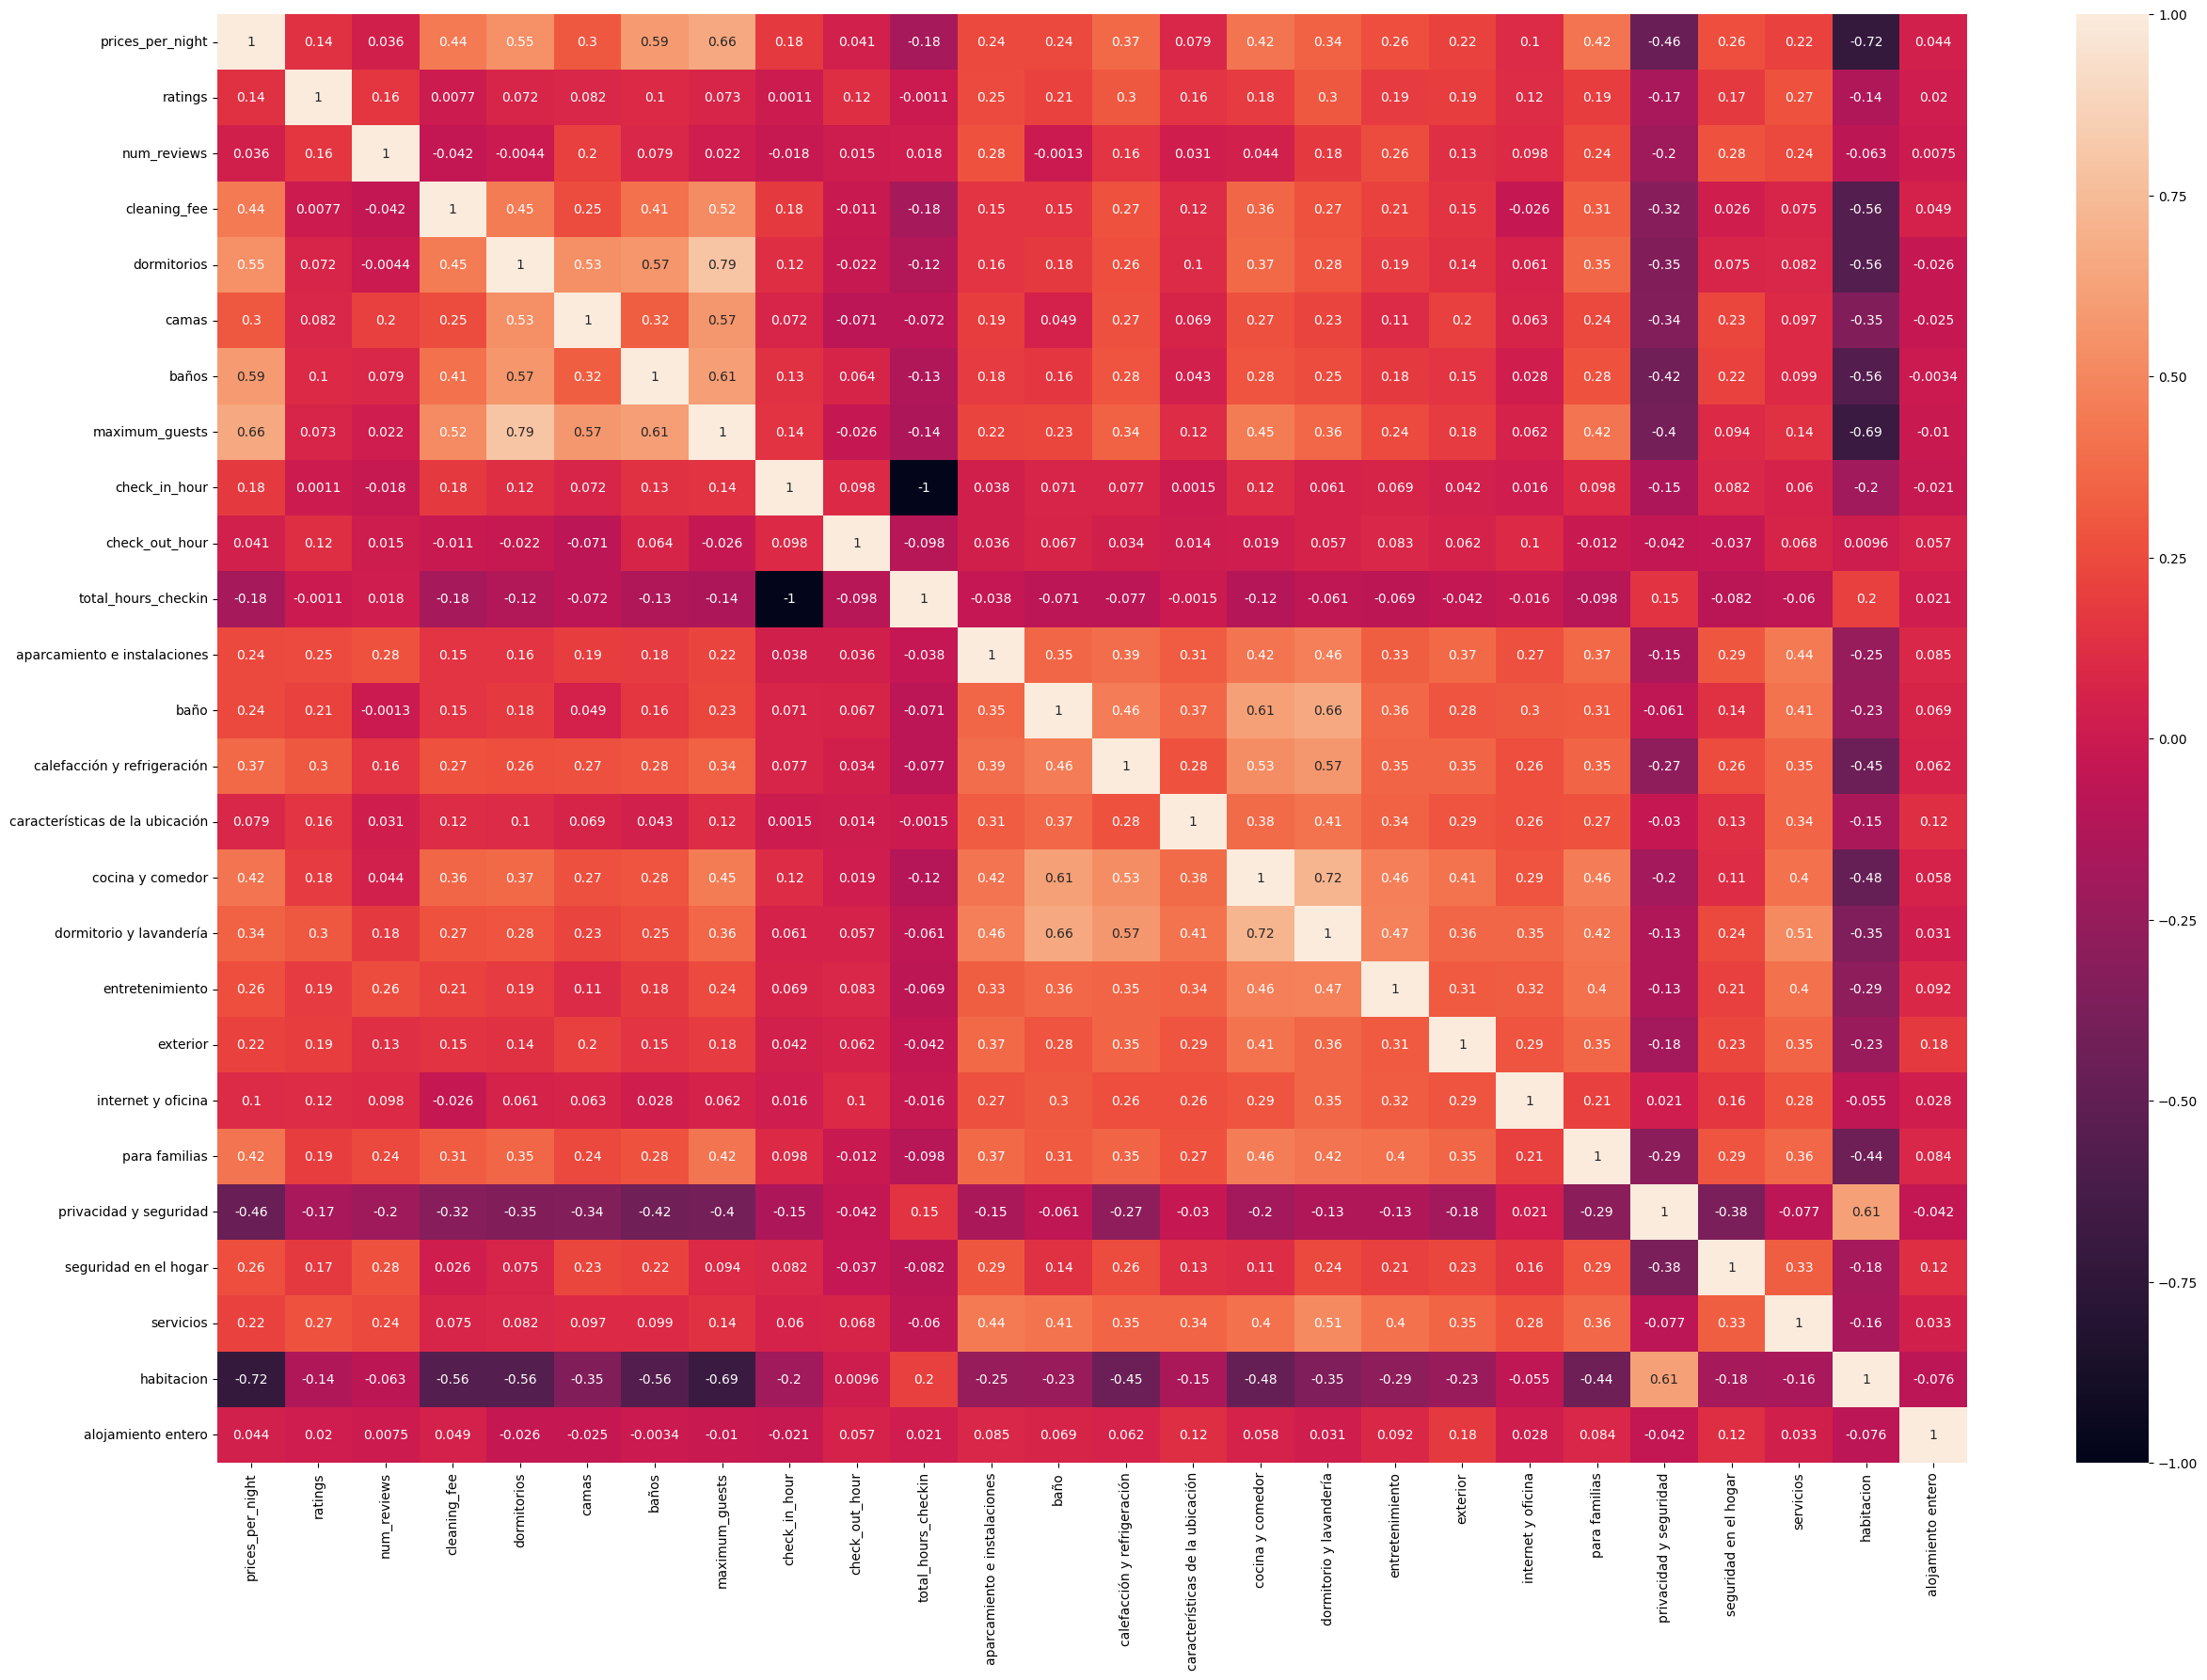

In [21]:
plt.figure(figsize=(30, 20))

sns.heatmap(data = df_encoded.corr(), annot = True)

## Feature Importance

Feature Importance:
 1. feature  0 ( 0.48096647647494417): habitacion
 2. feature  1 (  0.1141718891600332): baños
 3. feature  2 ( 0.07112964628449754): ratings
 4. feature  3 ( 0.04605920883826948): cleaning_fee
 5. feature  4 (   0.033259596936018): num_reviews
 6. feature  5 ( 0.02703379574407886): seguridad en el hogar
 7. feature  6 ( 0.02520497882002063): dormitorio y lavandería
 8. feature  7 (0.021602104842736773): maximum_guests
 9. feature  8 (0.021237140781566043): cocina y comedor
10. feature  9 ( 0.01949617537674836): para familias
11. feature 10 (0.014197483007313801): servicios
12. feature 11 (0.013768011005982392): baño
13. feature 12 ( 0.01343786830525265): exterior
14. feature 13 (0.011903660875559292): aparcamiento e instalaciones
15. feature 14 (0.011901314794327355): camas
16. feature 15 (0.011113325399551207): dormitorios
17. feature 16 ( 0.01043317809741355): características de la ubicación
18. feature 17 ( 0.00910424968706685): privacidad y seguridad
19. featur

<timed exec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

<timed exec>:26: UserWarning: 
The palette list has fewer values (17) than needed (25) and will cycle, which may produce an uninterpretable plot.


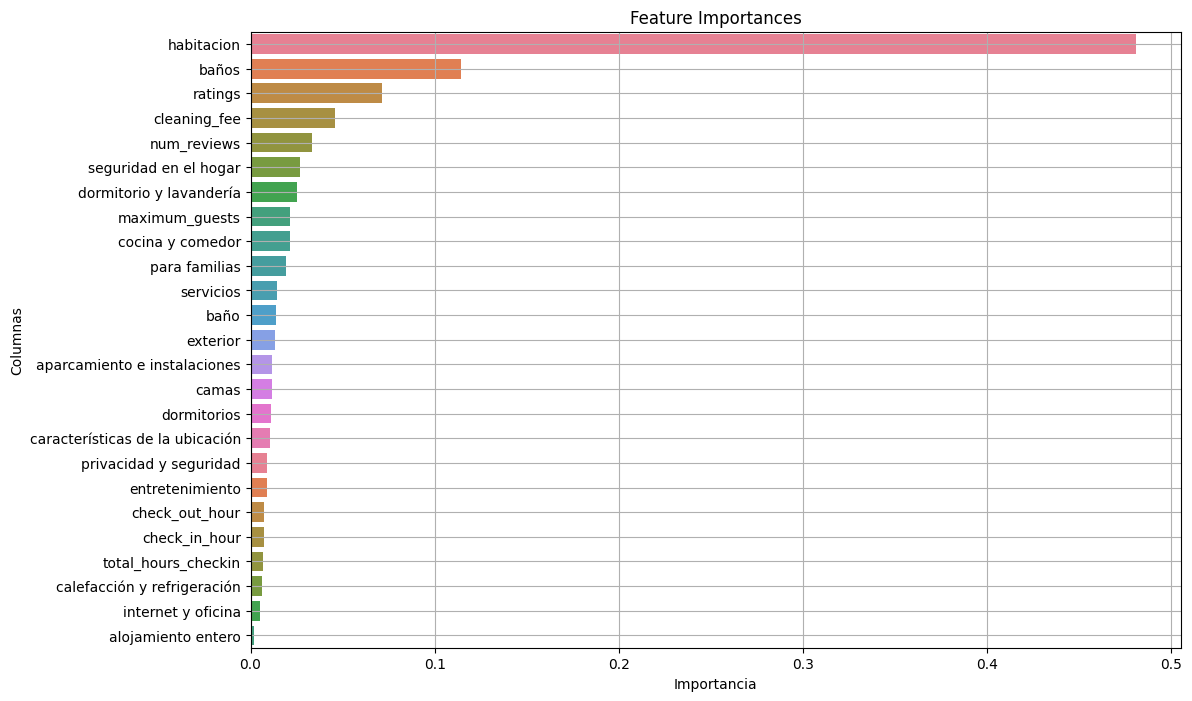

CPU times: total: 4.16 s
Wall time: 4.49 s


In [23]:
%%time

# Feature Importance

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 500,
                               random_state = 0)
# Entrenamos el modelo
model.fit(df.drop(["prices_per_night"], axis = 1), df["prices_per_night"])

# Calculamos Feature Importance
importances = model.feature_importances_

df = pd.DataFrame(data = zip(df.drop(["prices_per_night"], axis = 1).columns, importances),
                              columns = ["Columnas", "Importancia"])

df = df.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df["Importancia"], y = df["Columnas"], palette = sns.color_palette("husl", 17))

plt.grid()
plt.show()